# R-NSGA-III


Implementation details of this algorithm can be found in <cite data-cite="rnsga3"></cite>. The reference lines that should be used by this algorithm must be defined before it is executed. Commonly, the Das-Dennis method (implemented in UniformReferenceDirectionFactory) is used to sample reference directions uniformly.

To generate the reference directions refer to the [R-NSGA-III paper](https://ieeexplore.ieee.org/abstract/document/8628819) where the following procedure is laid out in detail.

<div style="text-align: center;">
    <img src="https://github.com/anyoptimization/pymoo-data/blob/main/docs/images/rnsga3_sketch.png?raw=true" width="250">
</div>

The algorithm follows the general NSGA-III procedure with a modified survival selection operator. First, the non-dominated sorting is done as in NSGA-III. 

<div style="text-align: center;">
    <img src="https://github.com/anyoptimization/pymoo-data/blob/main/docs/images/nsga3_survival_1.png?raw=true" width="250">
</div>

Second, from the splitting front (final front), some solutions need to be selected. Solutions are associated with reference directions based on perpendicular distance, then solutions with smaller ASF values are preferred by selecting solutions from the underrepresented reference direction first. For this reason, when this algorithm converges, each reference line seeks to find a good representative non-dominated solution.

### Example

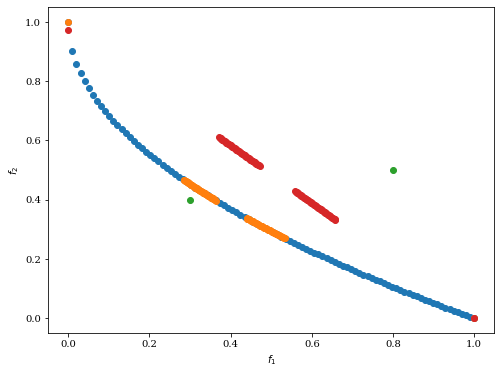

In [1]:
import numpy as np

from pymoo.algorithms.moo.rnsga3 import RNSGA3
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")
pf = problem.pareto_front()

# Define reference points
ref_points = np.array([[0.3, 0.4], [0.8, 0.5]])

# Get Algorithm
algorithm = RNSGA3(
    ref_points=ref_points,
    pop_per_ref_point=50,
    mu=0.1)

res = minimize(problem,
               algorithm=algorithm,
               termination=('n_gen', 300),
               pf=pf,
               seed=1,
               verbose=False)

reference_directions = res.algorithm.survival.ref_dirs

plot = Scatter()
plot.add(pf, label="pf")
plot.add(res.F, label="F")
plot.add(ref_points, label="ref_points")
plot.add(reference_directions, label="ref_dirs")
plot.show()

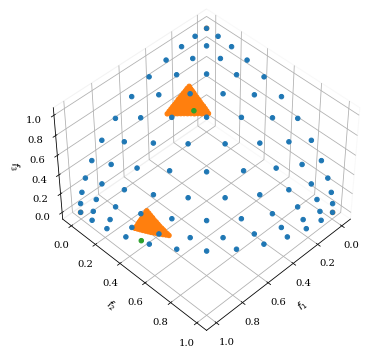

In [2]:
from pymoo.util.reference_direction import UniformReferenceDirectionFactory

# Get problem
problem = get_problem("dtlz4", n_var=12, n_obj=3)

# Define reference points and reference directions
ref_points = np.array([[1.0, 0.5, 0.2], [0.3, 0.2, 0.6]])
ref_dirs = UniformReferenceDirectionFactory(3, n_points=91).do()
pf = problem.pareto_front(ref_dirs)

# Get Algorithm
algorithm = RNSGA3(
    ref_points=ref_points,
    pop_per_ref_point=91,
    mu=0.1)

res = minimize(problem,
               algorithm,
               termination=('n_gen', 300),
               pf=pf,
               seed=1,
               verbose=False)


plot = Scatter()
plot.add(pf, label="pf")
plot.add(res.F, label="F")
plot.add(ref_points, label="ref_points")
plot.show()

### API